

```
function ClickConnect(){
    console.log("Clicked on connect button"); 
    document.querySelector("colab-connect-button").click()
}
setInterval(ClickConnect,60000)
```



# Starter code

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=c24231e279a457e4c640c052b86dda634e5fbc9c3ee39b9c600556f694ee4d67
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.8 GB  | Proc size: 159.5 MB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


In [ ]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# In case of OSError: [Errno 107] Transport endpoint is not connected, restart Kernel

FOLDERNAME = 'Depth_Estimation'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))




# this changes the working directory to the folder, and allows us to perform version control operations
%cd drive/My\ Drive/$FOLDERNAME
!git config --global user.email "arjun2000ashok@gmail.com"
!git config --global user.name "Arjun Ashok"



import matplotlib.pyplot as plt
import torch
torch.manual_seed(0)

import numpy as np
np.random.seed(0)

from PIL import Image
from io import BytesIO
%matplotlib inline

%load_ext autoreload
%autoreload 2

%load_ext tensorboard

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


# Git commit and push

In [ ]:
# !git reset --soft HEAD~1 # UNDO PREVIOUS COMMIT AND PUT THOSE FILES IN STAGING AREA
# !git status # - VIEW STAGED, UNTRACKED FILES
# !git reset HEAD -- . # - TO UNSTAGE FILES
# !git log # LOG

In [ ]:
!git add .
!git commit -m 'Fixed printing tensor'
!git push -u origin master

[master 07bf194] Fixed printing tensor
 6 files changed, 25 insertions(+), 7 deletions(-)
 rewrite __pycache__/evaluate.cpython-36.pyc (74%)
Counting objects: 9, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (9/9), done.
Writing objects: 100% (9/9), 1.97 MiB | 2.08 MiB/s, done.
Total 9 (delta 5), reused 0 (delta 0)
remote: Resolving deltas: 100% (5/5), completed with 5 local objects.
To https://github.com/aiarjun/Monocular-Depth-Estimation.git
   ff4942c..07bf194  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.


# Testing the dataloader

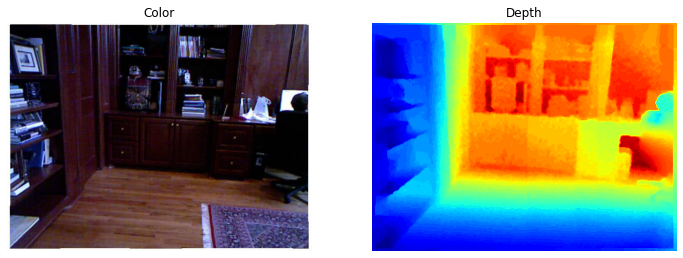

In [ ]:
# from model.dataloader import *

# path = 'data/raw/nyu_data.zip'
# dl = DataLoaders(path)

# dl = trainer.dataloaders

a = dl.get_val_dataloader(batch_size = 8, shuffle = True)
sample = next(iter(a))
images, depths = sample['img'], sample['depth']

image = images[0]
depth = depths[0]

import utils

utils.plot_sample_tensor(image, depth)

# Test code

In [ ]:
from utils import *
from model.net import DenseDepth 
from model.net import combined_loss

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model=DenseDepth() 
model = model.to(device)
load_checkpoint('experiments/train/best.pth.tar', model)
model = model.eval()
with torch.no_grad():
  predictions = model(images.cuda())
  loss = combined_loss(predictions, depths.cuda())

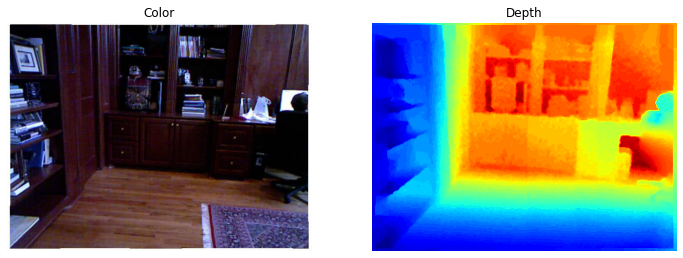

In [ ]:
plot_sample_tensor(sample['img'][0], sample['depth'][0])

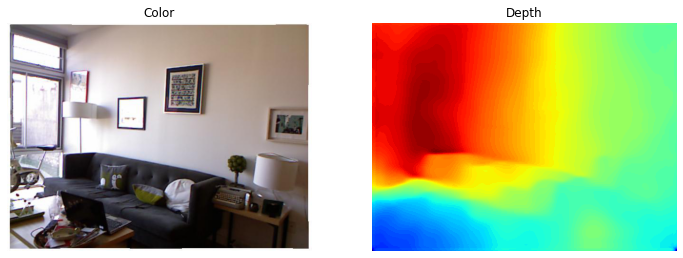

In [ ]:
plot_sample_tensor(sample['img'][2], predictions[2])

# Train

In [ ]:
from train import Trainer
trainer = Trainer()  

In [ ]:
%tensorboard --logdir runs

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# IMPORTANT: start Tensorboard before this
trainer.train_and_evaluate(batch_size = 8, checkpoint_file = 'experiments/train/last.pth.tar')

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth


NameError: ignored